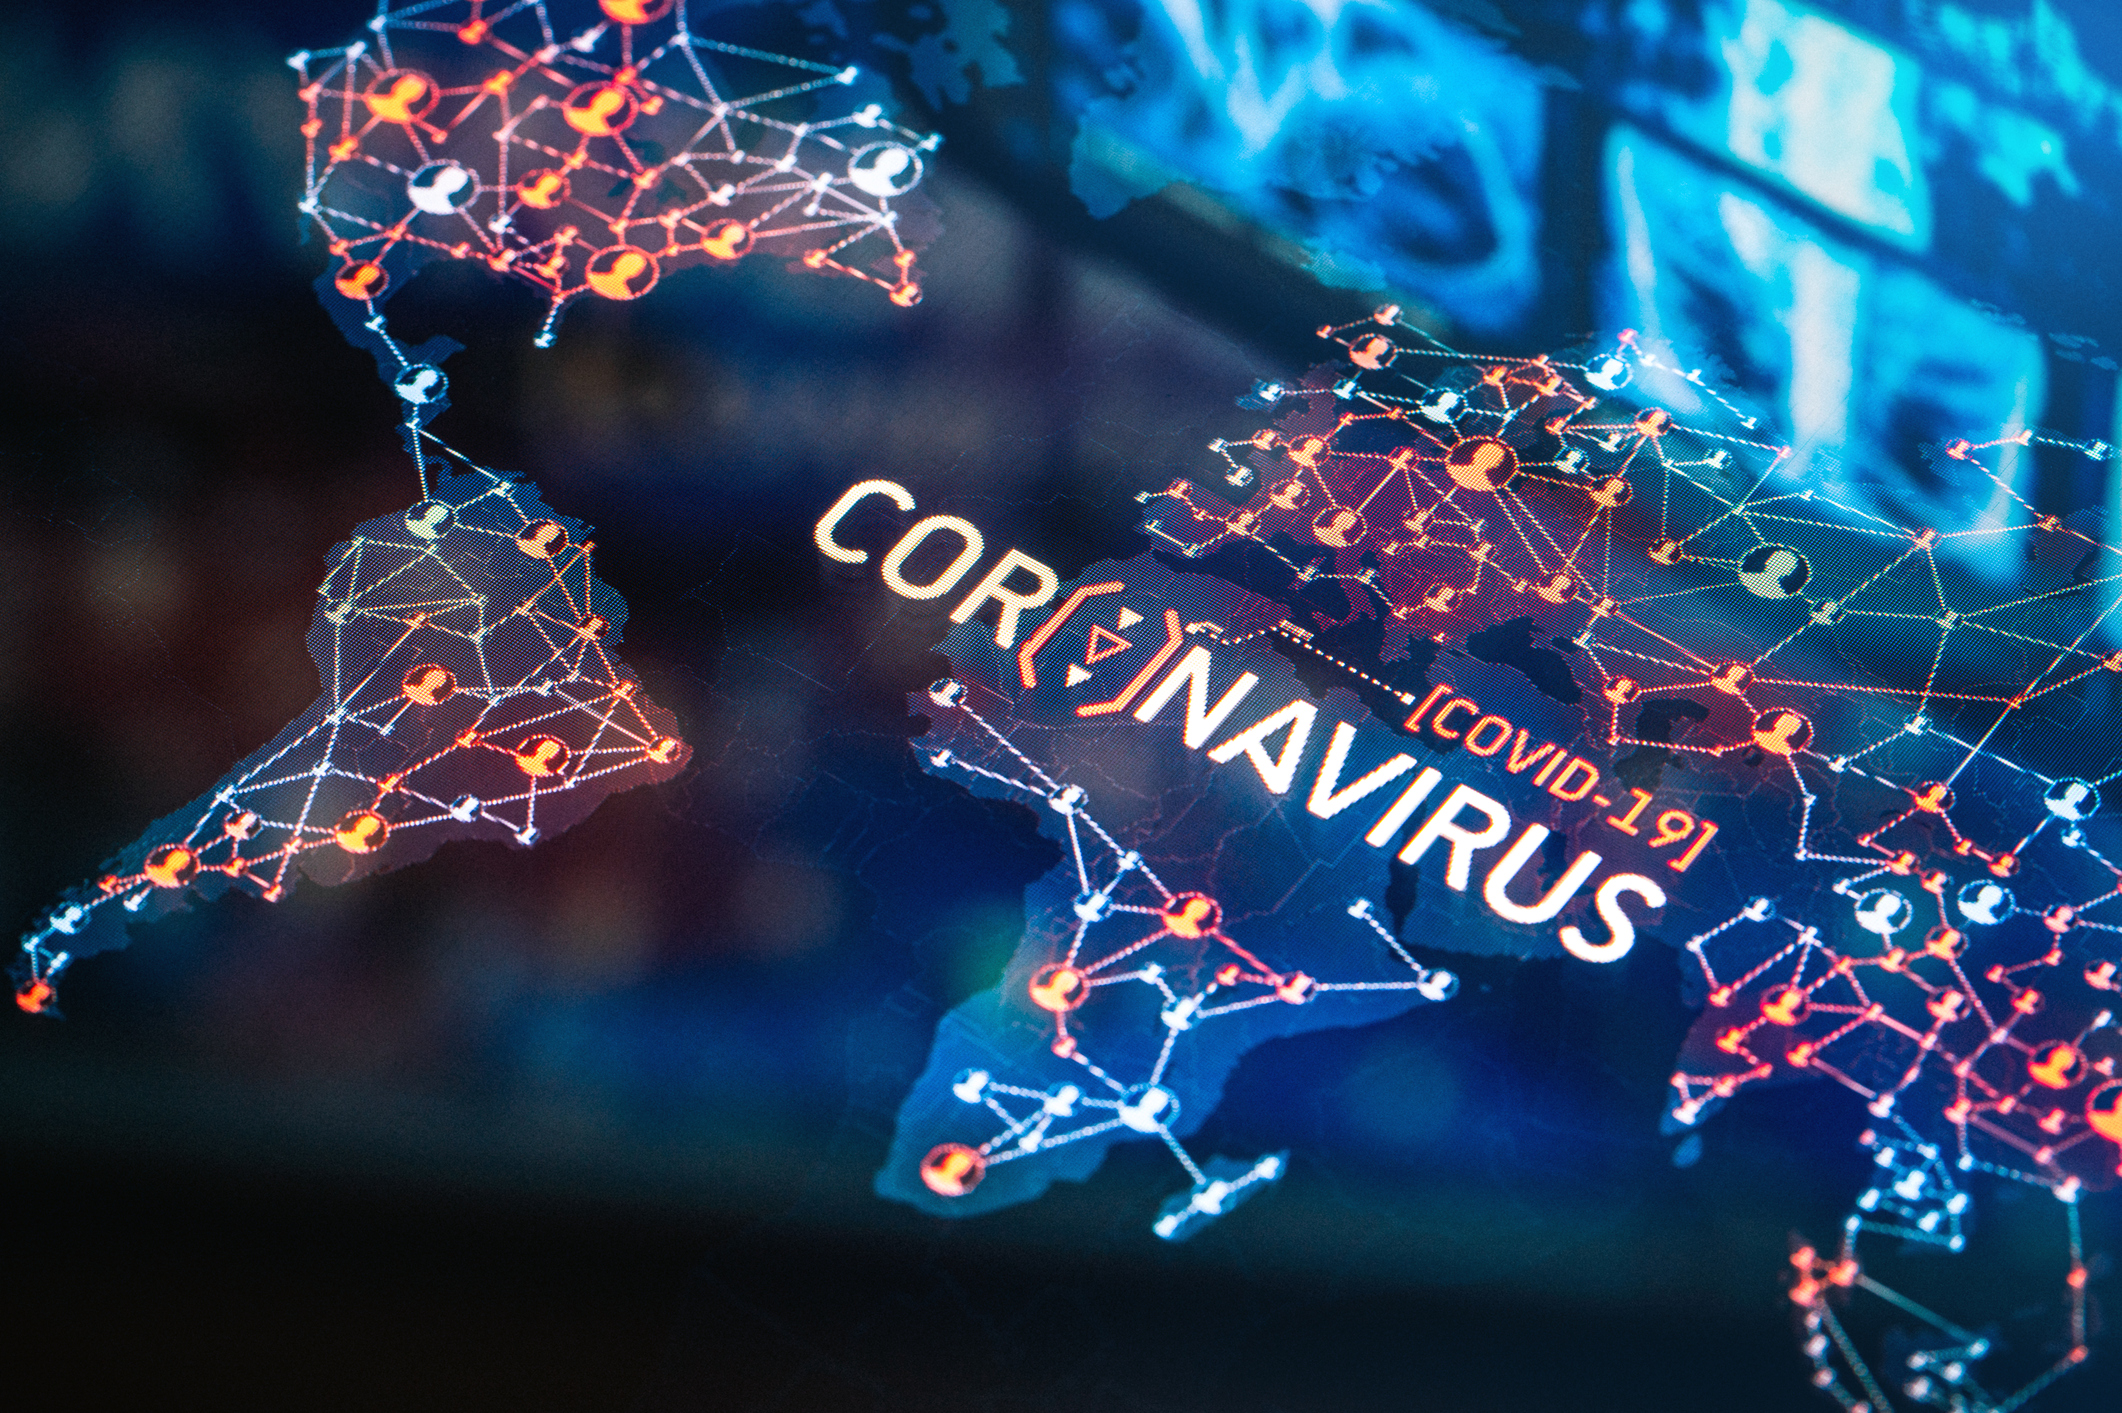

In [1]:
#from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load the OWID COVID-19 Dataset
data_url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(data_url)
df

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
318481      ZWE    Africa     Zimbabwe  2023-06-10     265161.0        0.0   
318482      ZWE    Africa     Zimbabwe  2023-06-11     265161.0        0.0   
318483      ZWE    Africa     Zimbabwe  2023-06-12     265289.0      128.0   
318484      ZWE    Africa     Zimbabwe  2023-06-13     265289.0        NaN   
318485      ZWE    Africa     Zimbabwe  2023-06-14     265289.0        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
318481               3.143        5695.0         0.0                  0.0   
318482               3.143        5695.0         0.0                  0.0   
318483              21.429        5702.0         7.0                  1.0   
318484                 NaN        5702.0         0.0                  1.0   
318485                 NaN        5702.0         0.0                  1.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
318481  ...          30.7                  36.791                         1.7   
318482  ...          30.7                  36.791                         1.7   
318483  ...          30.7                  36.791                         1.7   
318484  ...          30.7                  36.791                         1.7   
318485  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  41128772.0   
1                 64.83                    0.511  41128772.0   
2                 64.83                    0.511  41128772.0   
3                 64.83                    0.511  41128772.0   
4                 64.83                    0.511  41128772.0   
...                 ...                      ...         ...   
318481            61.49                    0.571  16320539.0   
318482            61.49                    0.571  16320539.0   
318483            61.49                    0.571  16320539.0   
318484            61.49                    0.571  16320539.0   
318485            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318486 entries, 0 to 318485
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    318486 non-null  object 
 1   continent                                   303335 non-null  object 
 2   location                                    318486 non-null  object 
 3   date                                        318486 non-null  object 
 4   total_cases                                 282164 non-null  float64
 5   new_cases                                   309582 non-null  float64
 6   new_cases_smoothed                          308318 non-null  float64
 7   total_deaths                                261272 non-null  float64
 8   new_deaths                                  309633 non-null  float64
 9   new_deaths_smoothed                         308403 non-null  float64
 

In [5]:
df.describe()

total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  2.821640e+05  3.095820e+05        3.083180e+05  2.612720e+05   
mean   5.947240e+06  1.051459e+04        1.055565e+04  8.168227e+04   
std    3.696975e+07  1.018162e+05        9.909500e+04  4.211927e+05   
min    1.000000e+00  0.000000e+00        0.000000e+00  1.000000e+00   
25%    6.993000e+03  0.000000e+00        8.570000e-01  1.230000e+02   
50%    6.343500e+04  1.500000e+01        3.557100e+01  1.269000e+03   
75%    6.601708e+05  4.970000e+02        6.101430e+02  1.086000e+04   
max    7.679842e+08  7.945883e+06        6.403052e+06  6.943377e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  309633.000000        308403.000000            282164.000000   
mean       93.759086            94.119869             90773.573864   
std       594.134317           584.865767            141236.129151   
min         0.000000             0.000000                 0.000000   
25%         0.000000             0.000000              2126.430500   
50%         0.000000             0.286000             22387.854500   
75%         5.000000             6.429000            113703.992000   
max     20042.000000         14674.571000            737554.506000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count          309582.000000                   308318.000000   
mean              158.893013                      159.469945   
std              1120.295441                      627.713596   
min                 0.000000                        0.000000   
25%                 0.000000                        0.203000   
50%                 2.082000                        9.874000   
75%                64.986250                       99.547500   
max            228872.025000                    37241.781000   

       total_deaths_per_million  ...   male_smokers  handwashing_facilities  \
count             261272.000000  ...  182655.000000           120891.000000   
mean                 823.622199  ...      32.911058               50.792247   
std                 1063.107643  ...      13.573206               31.955762   
min                    0.000000  ...       7.700000                1.188000   
25%                   53.321000  ...      22.600000               20.859000   
50%                  346.902000  ...      33.100000               49.839000   
75%                 1261.747500  ...      41.300000               83.241000   
max                 6480.930000  ...      78.100000              100.000000   

       hospital_beds_per_thousand  life_expectancy  human_development_index  \
count               217911.000000    292897.000000            239282.000000   
mean                     3.097502        73.717575                 0.722516   
std                      2.548366         7.396547                 0.148987   
min                      0.100000        53.280000                 0.394000   
25%                      1.300000        69.590000                 0.602000   
50%                      2.500000        75.050000                 0.740000   
75%                      4.200000        79.460000                 0.829000   
max                     13.800000        86.750000                 0.957000   

         population  excess_mortality_cumulative_absolute  \
count  3.184860e+05                          1.103900e+04   
mean   1.283937e+08                          4.825186e+04   
std    6.606302e+08                          1.411113e+05   
min    4.700000e+01                         -3.772610e+04   
25%    4.490020e+05                          4.600000e+01   
50%    5.882259e+06                          4.795100e+03   
75%    2.830170e+07                          3.259214e+04   
max    7.975105e+09                          1.288358e+06   

       excess_mortality_cumulative  excess_mortality  \
count                 11039.000000      11039.000000   
mean                      9.614913         12.217582   
std               

In [ ]:
 # Filter data for India, US, and China
countries = ['India', 'United States', 'China']
df_countries = df[df['location'].isin(countries)]
df_countries

iso_code      continent       location        date  total_cases  \
55398       CHN           Asia          China  2020-01-03          NaN   
55399       CHN           Asia          China  2020-01-04          1.0   
55400       CHN           Asia          China  2020-01-05          1.0   
55401       CHN           Asia          China  2020-01-06          4.0   
55402       CHN           Asia          China  2020-01-07          4.0   
...         ...            ...            ...         ...          ...   
300798      USA  North America  United States  2023-06-10  103436829.0   
300799      USA  North America  United States  2023-06-11  103436829.0   
300800      USA  North America  United States  2023-06-12  103436829.0   
300801      USA  North America  United States  2023-06-13  103436829.0   
300802      USA  North America  United States  2023-06-14  103436829.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
55398         0.0                 NaN           NaN         0.0   
55399         1.0                 NaN           NaN         0.0   
55400         0.0                 NaN           NaN         0.0   
55401         3.0                 NaN           NaN         0.0   
55402         0.0                 NaN           NaN         0.0   
...           ...                 ...           ...         ...   
300798        0.0                 0.0     1127152.0         0.0   
300799        0.0                 0.0     1127152.0         0.0   
300800        0.0                 0.0     1127152.0         0.0   
300801        0.0                 0.0     1127152.0         0.0   
300802        0.0                 0.0     1127152.0         0.0   

        new_deaths_smoothed  ...  male_smokers  handwashing_facilities  \
55398                   NaN  ...          48.4                     NaN   
55399                   NaN  ...          48.4                     NaN   
55400                   NaN  ...          48.4                     NaN   
55401                   NaN  ...          48.4                     NaN   
55402                   NaN  ...          48.4                     NaN   
...                     ...  ...           ...                     ...   
300798                  0.0  ...          24.6                     NaN   
300799                  0.0  ...          24.6                     NaN   
300800                  0.0  ...          24.6                     NaN   
300801                  0.0  ...          24.6                     NaN   
300802                  0.0  ...          24.6                     NaN   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
55398                         4.34            76.91                    0.761   
55399                         4.34            76.91                    0.761   
55400                         4.34            76.91                    0.761   
55401                         4.34            76.91                    0.761   
55402                         4.34            76.91                    0.761   
...                            ...              ...                      ...   
300798                        2.77            78.86                    0.926   
300799                        2.77            78.86                    0.926   
300800                        2.77            78.86                    0.926   
300801                        2.77            78.86                    0.926   
300802                        2.77            78.86                    0.926   

          population  excess_mortality_cumulative_absolute  \
55398   1.425887e+09                                   NaN   
55399   1.425887e+09                                   NaN   
55400   1.425887e+09                                   NaN   
55401   1.425887e+09                                   NaN   
55402   1.425887e+09                                   NaN   
...              ...                                   ...   
300798  3.382899e+08         

In [ ]:
# Data preprocessing
# Filter relevant columns
cols = ['date', 'location', 'new_cases', 'life_expectancy'] #new_cases
df_countries = df_countries[cols]
df_countries

date       location  new_cases  life_expectancy
55398   2020-01-03          China        0.0            76.91
55399   2020-01-04          China        1.0            76.91
55400   2020-01-05          China        0.0            76.91
55401   2020-01-06          China        3.0            76.91
55402   2020-01-07          China        0.0            76.91
...            ...            ...        ...              ...
300798  2023-06-10  United States        0.0            78.86
300799  2023-06-11  United States        0.0            78.86
300800  2023-06-12  United States        0.0            78.86
300801  2023-06-13  United States        0.0            78.86
300802  2023-06-14  United States        0.0            78.86

[3777 rows x 4 columns]

In [ ]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3777 entries, 55398 to 300802
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             3777 non-null   object 
 1   location         3777 non-null   object 
 2   new_cases        3774 non-null   float64
 3   life_expectancy  3777 non-null   float64
dtypes: float64(2), object(2)
memory usage: 147.5+ KB


In [ ]:
df_countries.isnull().sum()

date               0
location           0
new_cases          3
life_expectancy    0
dtype: int64

In [ ]:
df_countries['new_cases'] = df_countries['new_cases'].fillna(method='ffill')
df_countries

<ipython-input-9-cfe8e88bea2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['new_cases'] = df_countries['new_cases'].fillna(method='ffill')


date       location  new_cases  life_expectancy
55398   2020-01-03          China        0.0            76.91
55399   2020-01-04          China        1.0            76.91
55400   2020-01-05          China        0.0            76.91
55401   2020-01-06          China        3.0            76.91
55402   2020-01-07          China        0.0            76.91
...            ...            ...        ...              ...
300798  2023-06-10  United States        0.0            78.86
300799  2023-06-11  United States        0.0            78.86
300800  2023-06-12  United States        0.0            78.86
300801  2023-06-13  United States        0.0            78.86
300802  2023-06-14  United States        0.0            78.86

[3777 rows x 4 columns]

In [ ]:
# Format date column
df_countries['date'] = pd.to_datetime(df_countries['date'])

<ipython-input-10-09453fc304c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['date'] = pd.to_datetime(df_countries['date'])


DF - for all countries in world
df_countries - india us and china

In [ ]:
df['date'] = pd.to_datetime(df['date'])

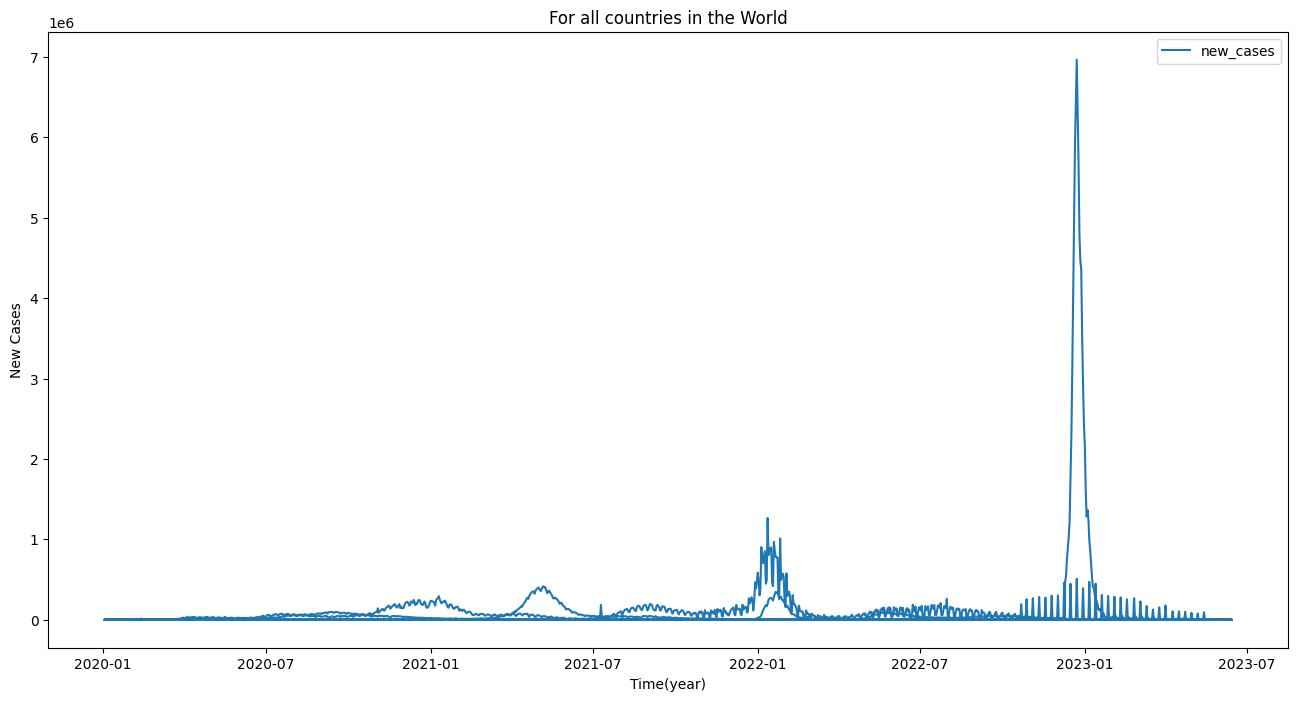

In [ ]:
df_countries.index = df_countries['date'] # indexing the Datetime to get the time period on the x-axis.
ts = df_countries['new_cases']
plt.figure(figsize=(16,8))
plt.plot(ts, label='new_cases')
plt.title('For all countries in the World')
plt.xlabel("Time(year)")
plt.ylabel("New Cases")
plt.legend(loc='best')

<Axes: xlabel='location'>

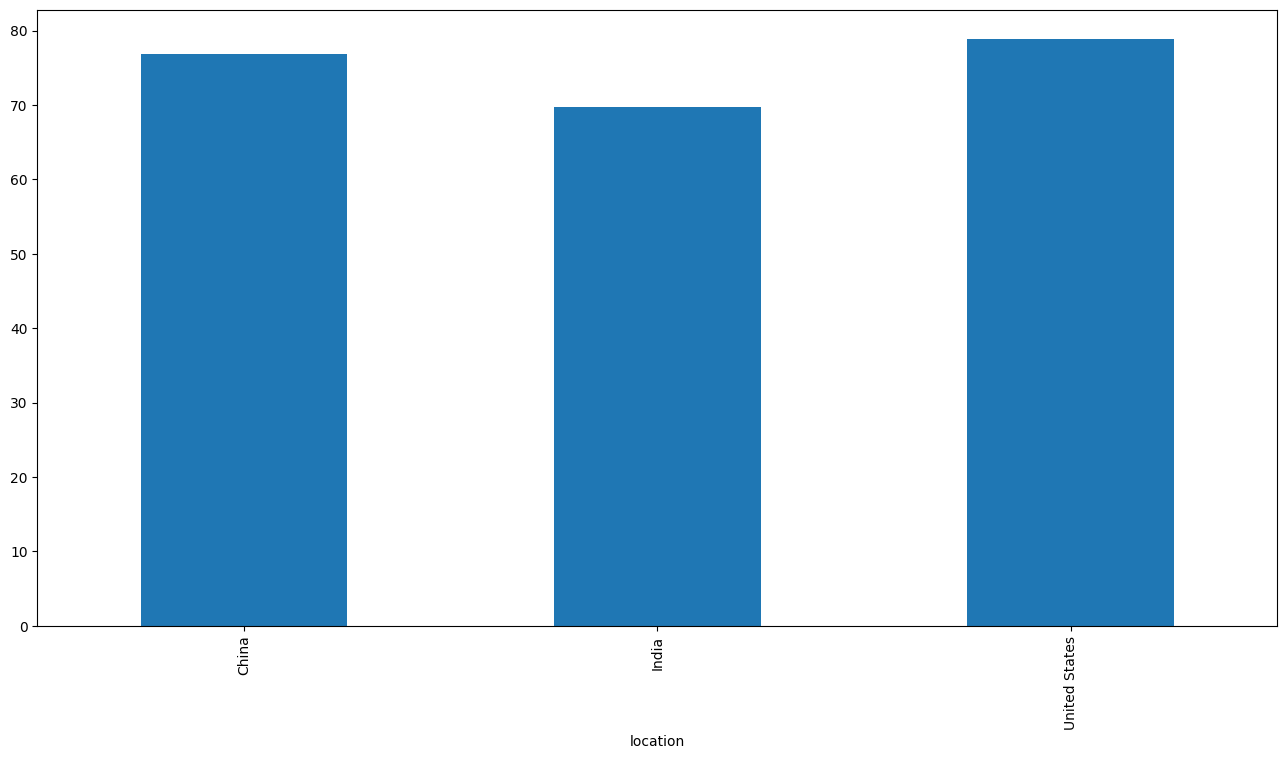

In [ ]:
plt.figure(figsize=(16,8))
df_countries.groupby('location')['life_expectancy'].mean().plot.bar()

In [ ]:
#train=df_countries.ix[:'2020-01-03']
#valid=df_countries.ix['2011-11-01':]
train = df_countries.loc[:'2020-01-03']
valid = df_countries.loc['2011-11-01':]


<ipython-input-14-7169b5198b01>:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  valid = df_countries.loc['2011-11-01':]


###ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['new_cases'], order=(1, 1, 1))
model_fit = model.fit()


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              new_cases   No. Observations:               318334
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -3552119.627
Date:                Thu, 15 Jun 2023   AIC                        7104245.255
Time:                        22:25:38   BIC                        7104277.268
Sample:                             0   HQIC                       7104254.491
                             - 318334                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0473      0.002     30.750      0.000       0.044       0.050
ma.L1         -0.1132      0.001    -77.026      0.000      -0.116      -0.110
sigma2      5.415e+08   1.82e-11   2.98e+19      0.000    5.42e+08    5.42e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):       15602199908.02
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                             7.58
Prob(H) (two-sided):                  0.00   Kurtosis:                      1087.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.34e+32. Standard errors may be unstable.
"""

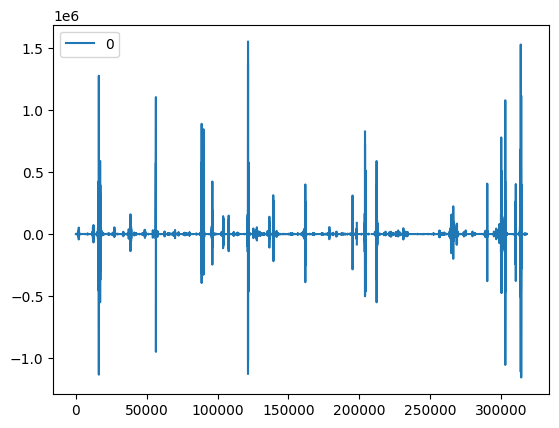

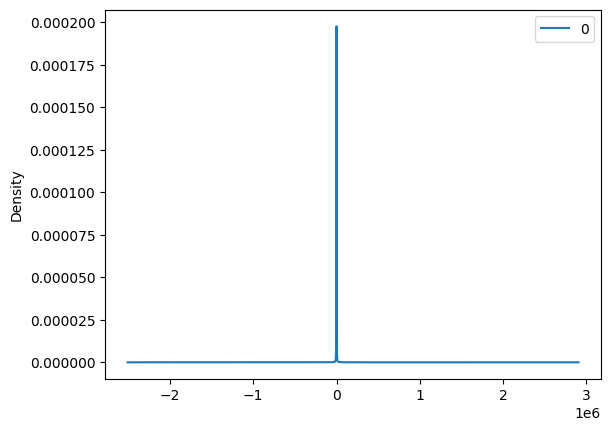

                  0
count  3.095820e+05
mean   1.745824e-02
std    2.326814e+04
min   -1.155759e+06
25%   -1.648558e+01
50%   -1.733552e-06
75%    4.991907e+00
max    1.551700e+06


In [ ]:
from matplotlib import pyplot
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

<Axes: >

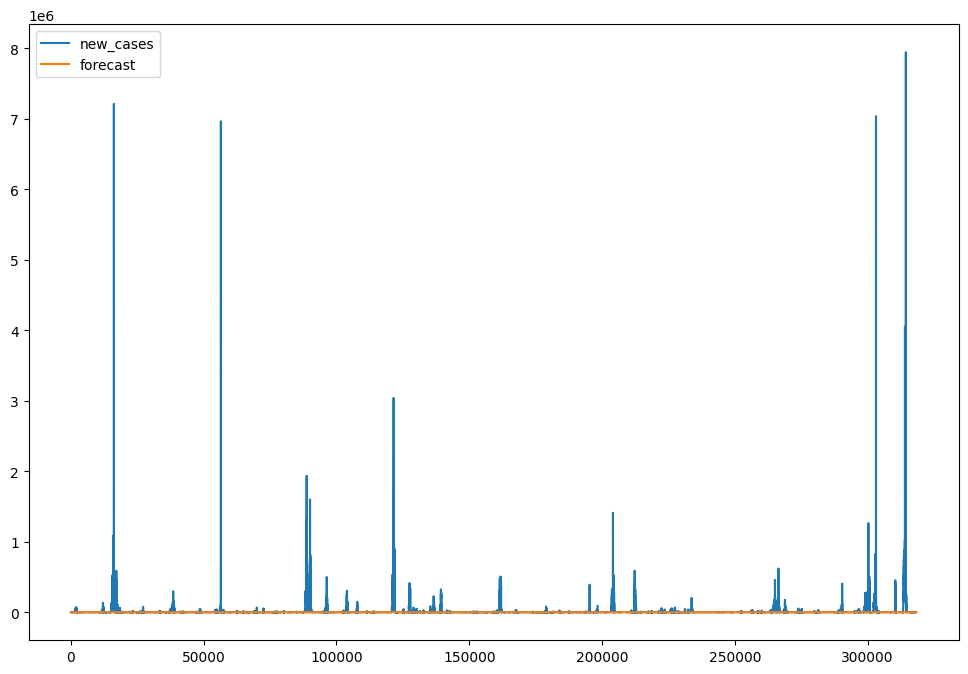

In [ ]:
df['forecast']=model_fit.predict(dynamic=True)
df[['new_cases','forecast']].plot(figsize=(12,8))

<Axes: >

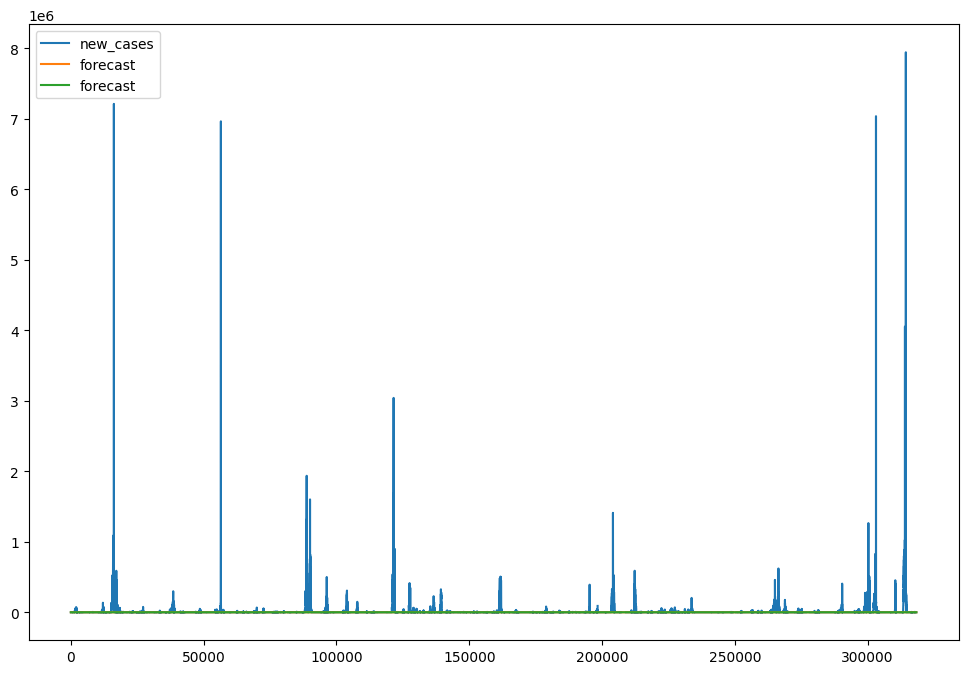

In [ ]:
forecast = model_fit.predict(dynamic=True)
forecast_df = pd.DataFrame({'forecast': forecast}, index=df.index)
df_with_forecast = pd.concat([df, forecast_df], axis=1)

df_with_forecast[['new_cases', 'forecast']].plot(figsize=(12, 8))


### SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['new_cases'], order=(1, 1, 1))
sar_model_fit = model.fit()


In [ ]:
df_countries.isnull().sum()

date               0
location           0
new_cases          0
life_expectancy    0
dtype: int64

In [ ]:

# Pivot the data to have dates as rows and countries as columns
df_pivot = df_countries.pivot(index='date', columns='location', values='new_cases')
df_pivot

location     China  India  United States
date                                    
2020-01-03     0.0    0.0            0.0
2020-01-04     1.0    0.0            0.0
2020-01-05     0.0    0.0            0.0
2020-01-06     3.0    0.0            0.0
2020-01-07     0.0    0.0            0.0
...            ...    ...            ...
2023-06-10   260.0  186.0            0.0
2023-06-11   191.0  140.0            0.0
2023-06-12  1805.0   92.0            0.0
2023-06-13    78.0   80.0            0.0
2023-06-14     0.0    0.0            0.0

[1259 rows x 3 columns]

In [ ]:
df_pivot.isnull().sum()

location
China            0
India            0
United States    0
dtype: int64

In [ ]:
df_pivot = df_pivot.fillna(method='ffill')

In [ ]:
df_pivot.isnull().sum()

location
China            0
India            0
United States    0
dtype: int64

In [ ]:
# Display the preprocessed data
print(df_pivot.head ())

location    China  India  United States
date                                   
2020-01-03    0.0    0.0            0.0
2020-01-04    1.0    0.0            0.0
2020-01-05    0.0    0.0            0.0
2020-01-06    3.0    0.0            0.0
2020-01-07    0.0    0.0            0.0


In [ ]:
df_pivot.head(30)

location     China  India  United States
date                                    
2020-01-03     0.0    0.0            0.0
2020-01-04     1.0    0.0            0.0
2020-01-05     0.0    0.0            0.0
2020-01-06     3.0    0.0            0.0
2020-01-07     0.0    0.0            0.0
2020-01-08     0.0    0.0            0.0
2020-01-09     0.0    0.0            0.0
2020-01-10     0.0    0.0            0.0
2020-01-11     0.0    0.0            0.0
2020-01-12    41.0    0.0            0.0
2020-01-13     0.0    0.0            0.0
2020-01-14     0.0    0.0            0.0
2020-01-15     0.0    0.0            0.0
2020-01-16     0.0    0.0            0.0
2020-01-17     4.0    0.0            0.0
2020-01-18     0.0    0.0            0.0
2020-01-19    76.0    0.0            0.0
2020-01-20    77.0    0.0            1.0
2020-01-21    93.0    0.0            0.0
2020-01-22   147.0    0.0            0.0
2020-01-23   132.0    0.0            0.0
2020-01-24   261.0    0.0            0.0
2020-01-25   462.0    0.0            5.0
2020-01-26   688.0    0.0            1.0
2020-01-27   776.0    0.0            0.0
2020-01-28  1772.0    0.0            1.0
2020-01-29  1464.0    0.0            0.0
2020-01-30  1739.0    1.0            0.0
2020-01-31  1984.0    4.0            0.0
2020-02-01  2101.0    0.0            0.0

In [ ]:
print(df_pivot.head())

location    China  India  United States
date                                   
2020-01-03    0.0    0.0            0.0
2020-01-04    1.0    0.0            0.0
2020-01-05    0.0    0.0            0.0
2020-01-06    3.0    0.0            0.0
2020-01-07    0.0    0.0            0.0


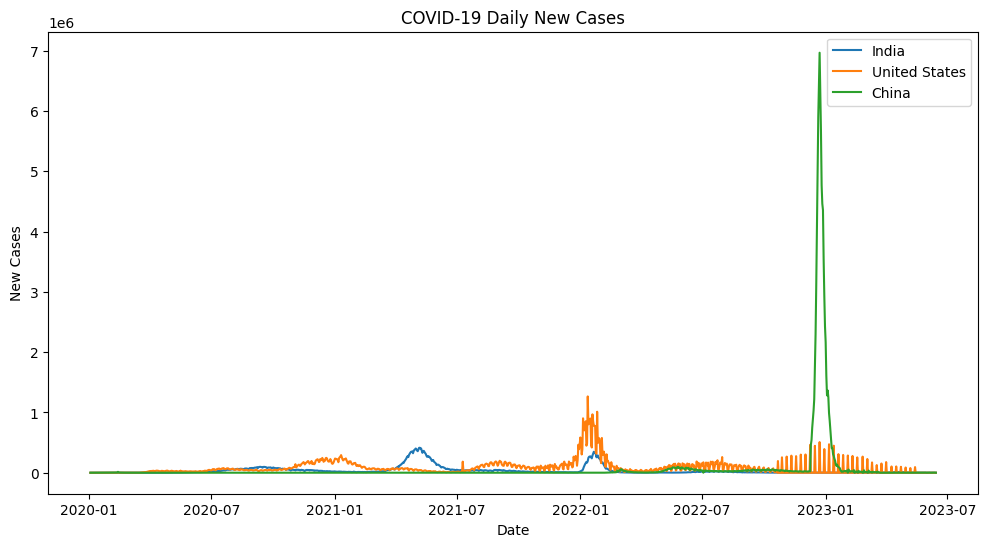

In [ ]:

# EDA - Visualizing the data
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot['India'], label='India')
plt.plot(df_pivot.index, df_pivot['United States'], label='United States')
plt.plot(df_pivot.index, df_pivot['China'], label='China')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('COVID-19 Daily New Cases')
plt.legend()
plt.show()

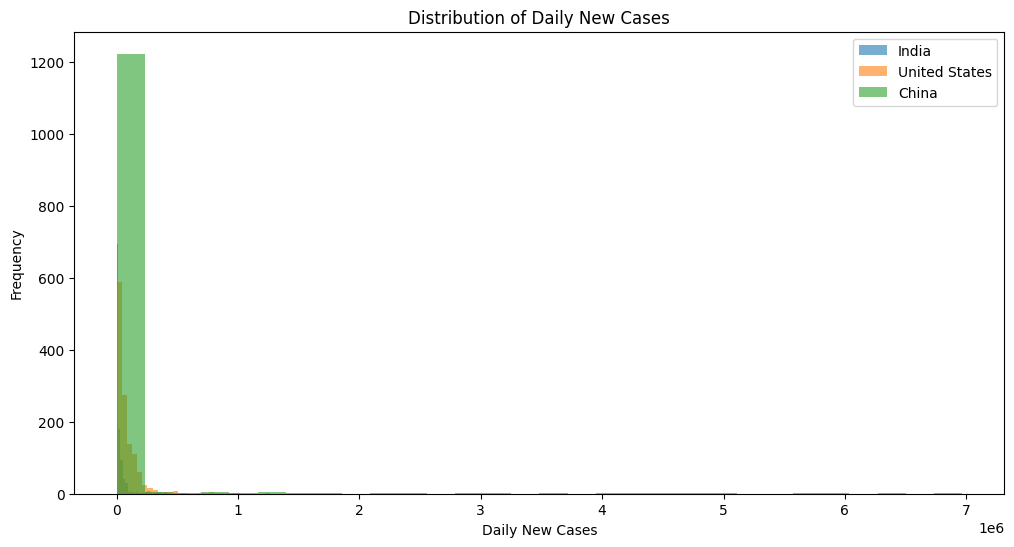

In [ ]:
# 1. Daily new cases distribution
plt.figure(figsize=(12, 6))
for country in countries:
    plt.hist(df_pivot[country], bins=30, alpha=0.6, label=country)
plt.xlabel('Daily New Cases')
plt.ylabel('Frequency')
plt.title('Distribution of Daily New Cases')
plt.legend()
plt.show()

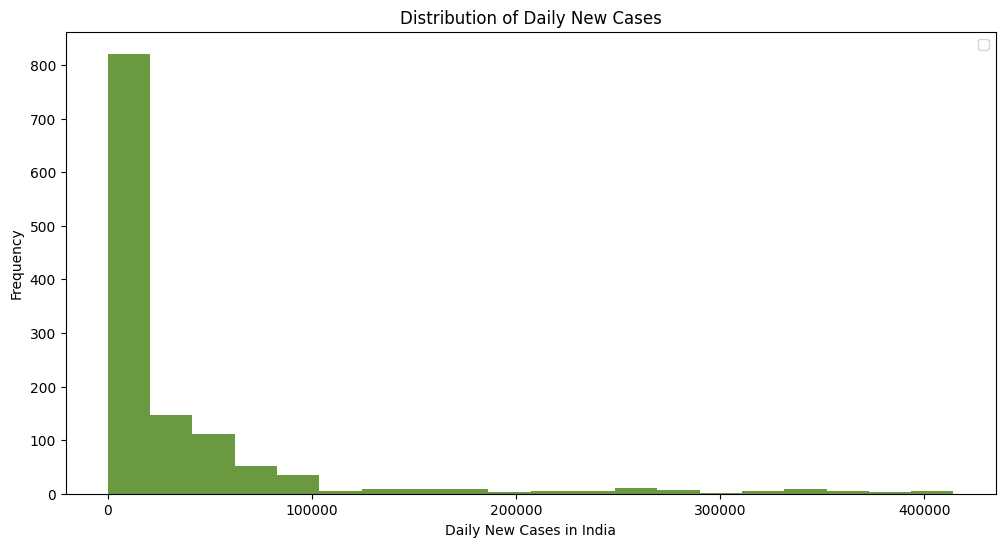

In [ ]:
# 1. Daily new cases distribution
plt.figure(figsize=(12, 6))
for country in countries:
    plt.hist(df_pivot['India'], bins=20, alpha=0.6)
plt.xlabel('Daily New Cases in India')
plt.ylabel('Frequency')
plt.title('Distribution of Daily New Cases')
plt.legend()
plt.show()

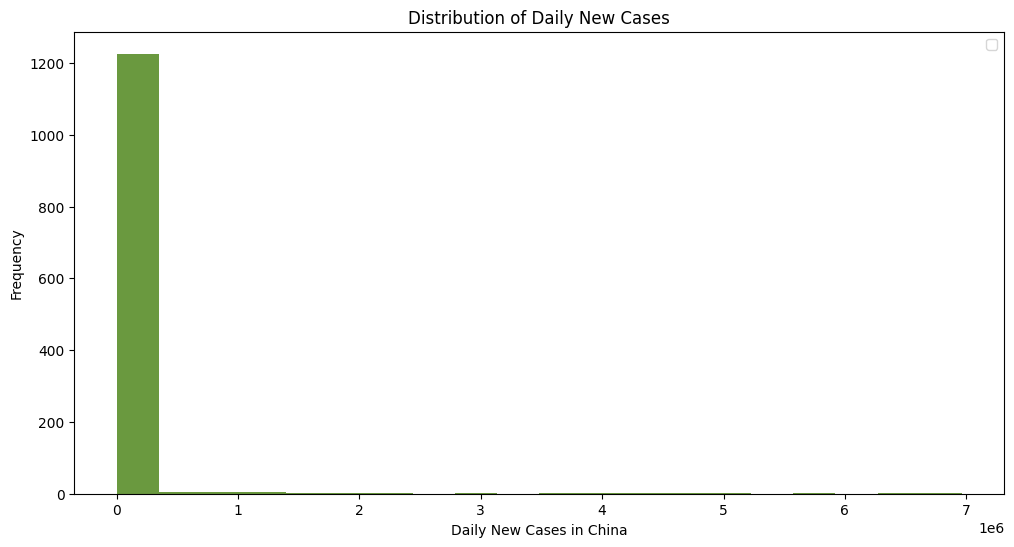

In [ ]:
# 1. Daily new cases distribution
plt.figure(figsize=(12, 6))
for country in countries:
    plt.hist(df_pivot['China'], bins=20, alpha=0.6)
plt.xlabel('Daily New Cases in China')
plt.ylabel('Frequency')
plt.title('Distribution of Daily New Cases')
plt.legend()
plt.show()

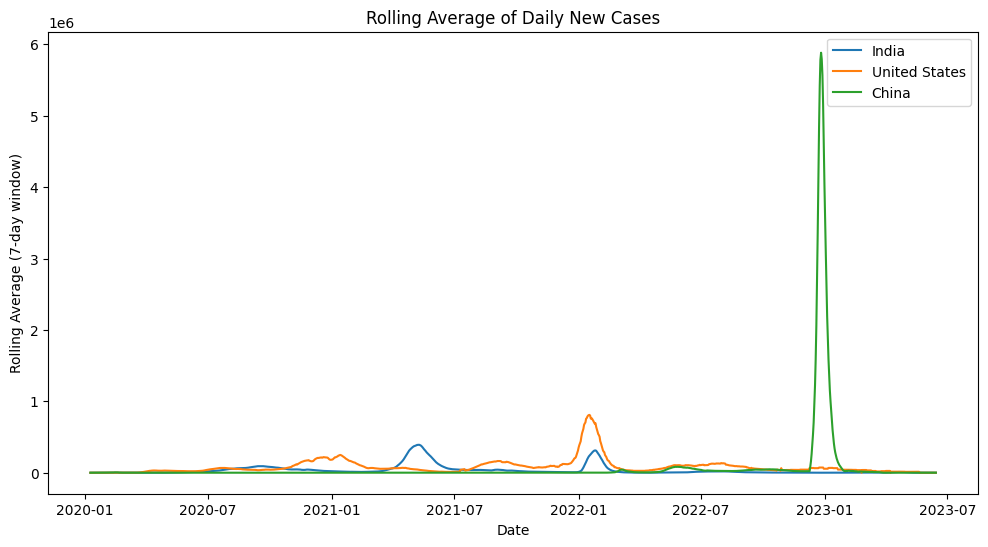

In [ ]:
# 2. Rolling averages
window_size = 7
df_rolling = df_pivot.rolling(window=window_size).mean()
plt.figure(figsize=(12, 6))
for country in countries:
    plt.plot(df_rolling[country], label=country)
plt.xlabel('Date')
plt.ylabel('Rolling Average ({}-day window)'.format(window_size))
plt.title('Rolling Average of Daily New Cases')
plt.legend()
plt.show()

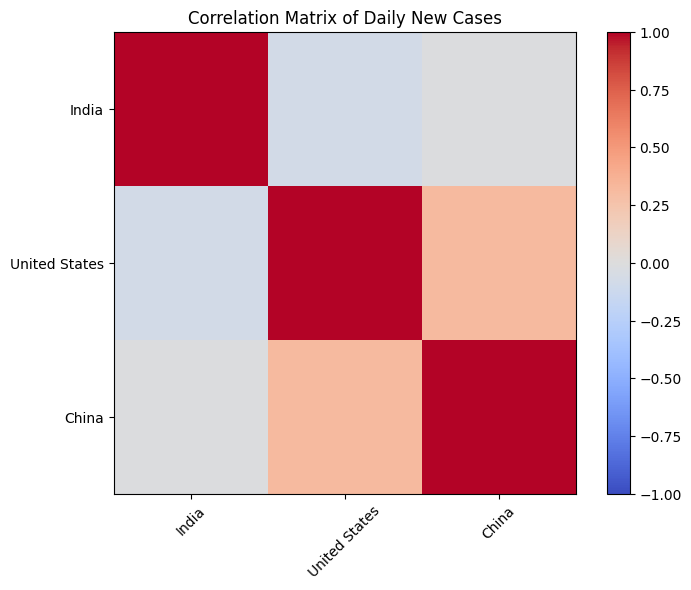

In [ ]:
# 3. Correlation analysis
correlation_matrix = df_pivot.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(countries)), countries, rotation=45)
plt.yticks(range(len(countries)), countries)
plt.title('Correlation Matrix of Daily New Cases')
plt.show()

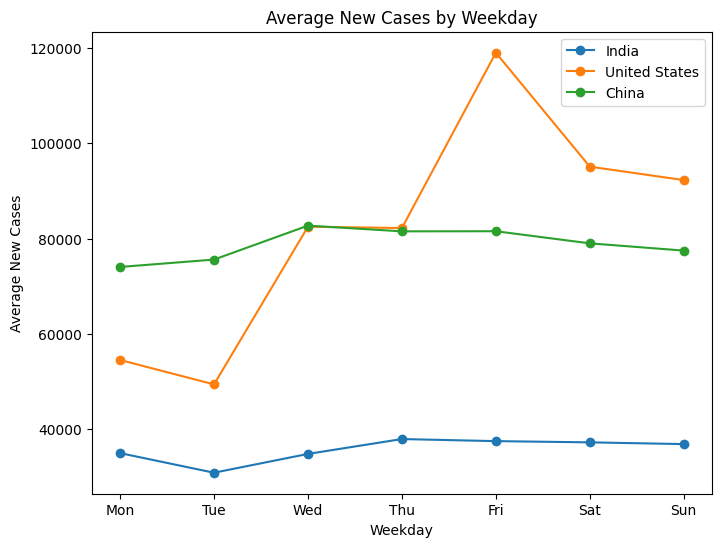

In [ ]:
# 4. Weekly seasonality
df_pivot['weekday'] = df_pivot.index.weekday
weekday_avg = df_pivot.groupby('weekday')[countries].mean()
plt.figure(figsize=(8, 6))
for country in countries:
    plt.plot(weekday_avg.index, weekday_avg[country], marker='o', label=country)
plt.xlabel('Weekday')
plt.ylabel('Average New Cases')
plt.title('Average New Cases by Weekday')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.show()

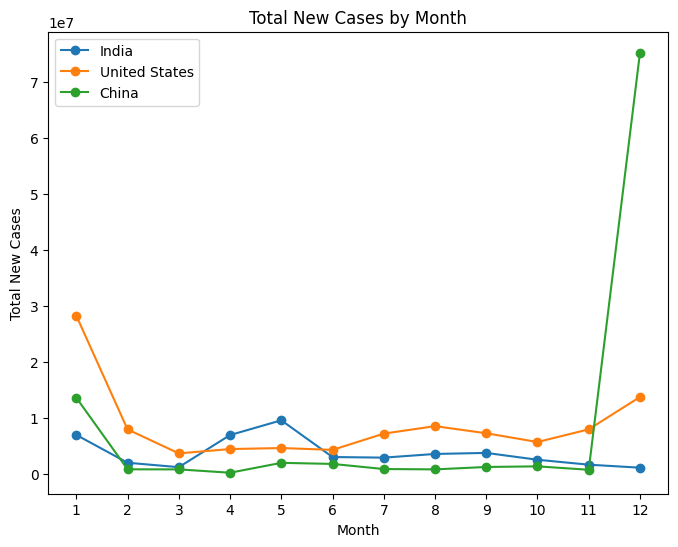

In [ ]:
# 5. Month-wise comparison
df_pivot['month'] = df_pivot.index.month
monthly_total = df_pivot.groupby('month')[countries].sum()
plt.figure(figsize=(8, 6))
for country in countries:
    plt.plot(monthly_total.index, monthly_total[country], marker='o', label=country)
plt.xlabel('Month')
plt.ylabel('Total New Cases')
plt.title('Total New Cases by Month')
plt.xticks(range(1, 13))
plt.legend()
plt.show()

<ipython-input-39-7db5c67d7a79>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pivot['India'], hist = True, kde = True,


<Axes: xlabel='India', ylabel='Density'>

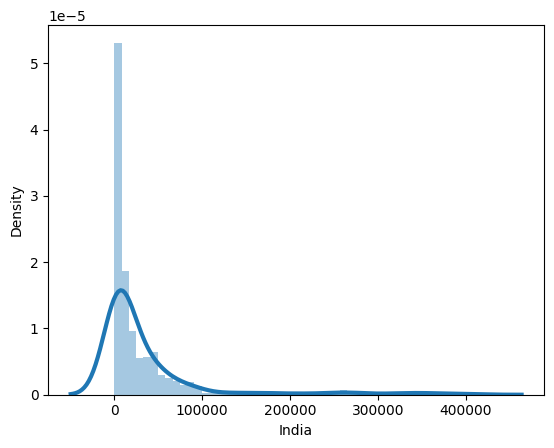

In [ ]:
import seaborn as sns

sns.distplot(df_pivot['India'], hist = True, kde = True,
                 kde_kws = {'linewidth': 3})

<ipython-input-40-f75746d7bed2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pivot['China'], hist = True, kde = True,


<Axes: xlabel='China', ylabel='Density'>

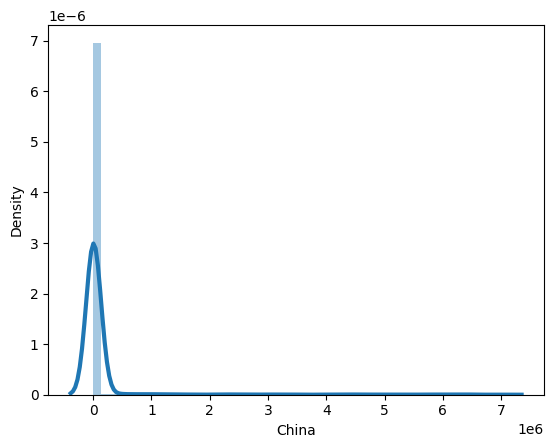

In [ ]:
import seaborn as sns

sns.distplot(df_pivot['China'], hist = True, kde = True,
                 kde_kws = {'linewidth': 3})

In [ ]:
df_countries['location'].value_counts()

China            1259
India            1259
United States    1259
Name: location, dtype: int64

In [ ]:
# Assuming X contains the input features and y contains the target variable
X = df_pivot.index.values.reshape(-1, 1)  # Example: Date as the input feature
y = df_pivot[['India', 'China', 'United States']].values  # Example: COVID-19 cases in India, China, and United States
# Convert X to float64
X = X.astype('float64')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from math import sqrt
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_lr_pred)
print('Linear Regression MSE:', lr_mse)
lrrmse = sqrt(lr_mse)
print("RMSE is",lrrmse)

Linear Regression MSE: 59911349046.437584
RMSE is 244767.94938561213


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X contains the input features and y contains the target variable
X = df_pivot.index.values.reshape(-1, 1)  # Example: Date as the input feature
y = df_pivot['India'].values  # Example: COVID-19 cases in India

# Convert X to float64
X = X.astype('float64')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_lr_pred = lr_model.predict(X_test)

# Calculate the mean squared error (MSE)
lr_mse = mean_squared_error(y_test, y_lr_pred)
print('Linear Regression MSE:', lr_mse)

# Calculate the root mean squared error (RMSE)
lr_rmse = sqrt(lr_mse)
print('Linear Regression RMSE:', lr_rmse)


Linear Regression MSE: 3486400184.3481417
Linear Regression RMSE: 59045.746539002634


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_rf_pred)
print('Random Forest MSE:', rf_mse)
rfrmse = sqrt(rf_mse)
print("RMSE is",rfrmse)

Random Forest MSE: 29040400.436579365
RMSE is 5388.914587983313


In [ ]:
from sklearn.svm import SVR
rf_model = SVR(kernel='rbf')
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
svr_mse = mean_squared_error(y_test, y_rf_pred)
print('SVR MSE:', svr_mse)
svrmse = sqrt(svr_mse)
print("SVR - RMSE is",svrmse)

SVR MSE: 4030680533.5130115
SVR - RMSE is 63487.640793409635


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
rf_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
et_mse = mean_squared_error(y_test, y_rf_pred)
print('ExtraTreesRegressor MSE:', et_mse)
et_rmse = sqrt(et_mse)
print("ET - RMSE is",et_rmse)

ExtraTreesRegressor MSE: 25141383.611009922
ET - RMSE is 5014.118428099791


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit SARIMA model
model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast
y_pred = model_fit.forecast(steps=len(X_test))

# Calculate MSE
sar_mse = mean_squared_error(y_test, y_pred)
print('SARIMA MSE:', sar_mse)

#RMSE
sar_rmse = sqrt(sar_mse) # Change Here to mse
print("SARIMA RMSE is",sar_rmse)

SARIMA MSE: 3855045202.328006
SARIMA RMSE is 62089.0103184775


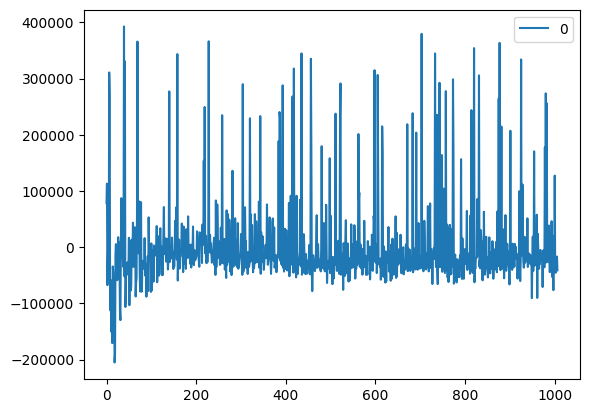

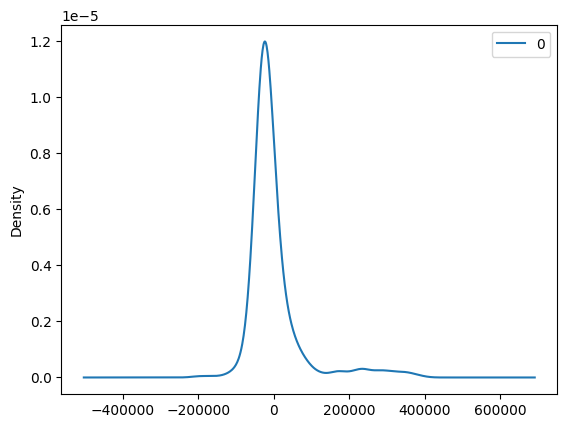

                   0
count    1007.000000
mean     -235.733665
std     74382.827800
min   -205054.467418
25%    -34726.904755
50%    -19228.490607
75%      4677.010005
max    392849.748859


In [ ]:
from matplotlib import pyplot
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y_train, order=(1, 1, 50))
ar_model_fit = model.fit()

# Forecast
y_pred = ar_model_fit.forecast(steps=len(X_test))

# Calculate MSE
ar_mse = mean_squared_error(y_test, y_pred)
print('ARIMA MSE:', ar_mse)

#RMSE
ar_rmse = sqrt(ar_mse) # Change Here to rmse
print("ARIMA RMSE is",ar_rmse)

model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA MSE: 3574932537.6779284
ARIMA RMSE is 59790.739564567426


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1007
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -12685.692
Date:                            Thu, 15 Jun 2023   AIC                          25381.383
Time:                                    23:05:26   BIC                          25405.892
Sample:                                         0   HQIC                         25390.701
                                           - 1007                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0086      0.078      0.111      0.912      -0.144       0.162
ma.L1         -0.9929      0.022    -45.386      0.000      -1.036      -0.950
ar.S.L12      -0.0466      0.090     -0.518      0.604      -0.223       0.130
ma.S.L12      -0.9347      0.036    -25.660      0.000      -1.006      -0.863
sigma2       1.25e+10    6.7e-13   1.87e+22      0.000    1.25e+10    1.25e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              5498.80
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                             2.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.66e+38. Standard errors may be unstable.
"""

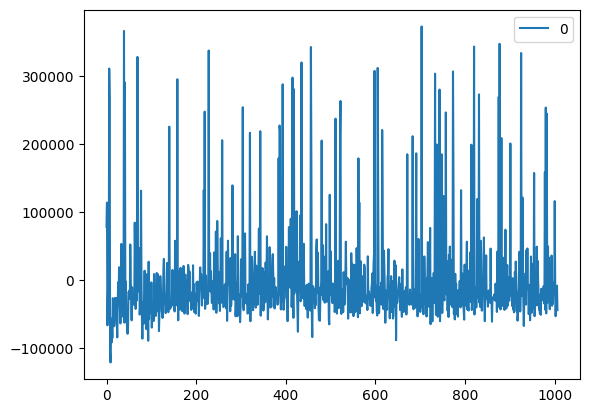

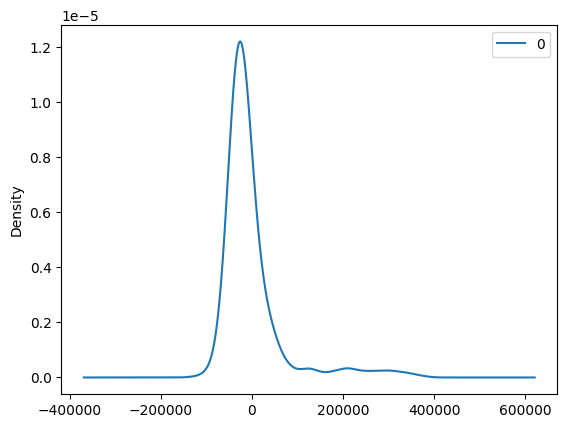

                   0
count    1007.000000
mean    -1355.567707
std     70266.538885
min   -121396.519903
25%    -35286.856605
50%    -20315.655083
75%      3289.218733
max    373502.421213


In [ ]:
from matplotlib import pyplot
residuals = pd.DataFrame(ar_model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

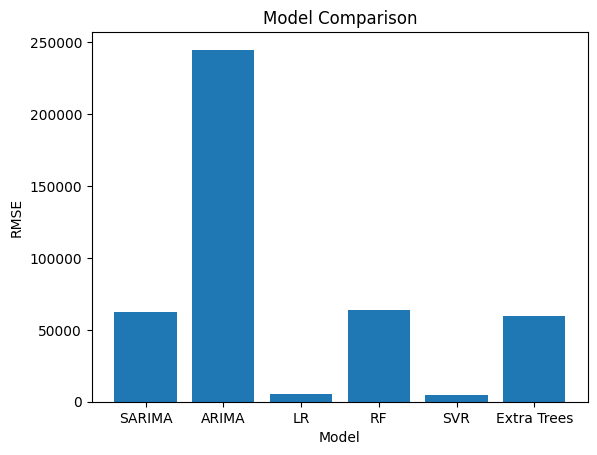

In [ ]:
# Compare the model accuracies
model_names = ['SARIMA','ARIMA', 'LR', 'RF','SVR','Extra Trees']
rmse_scores = [sar_rmse, lrrmse, rfrmse,svrmse, et_rmse, ar_rmse]  # Update with MSE scores from other models

# Plotting the model accuracies
import matplotlib.pyplot as plt

plt.bar(model_names, rmse_scores)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Comparison')
plt.show()


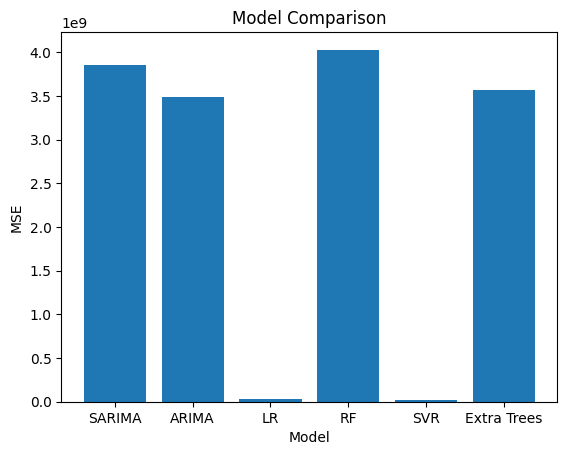

In [ ]:
# Compare the model accuracies
model_names = ['SARIMA','ARIMA', 'LR', 'RF','SVR','Extra Trees']
rmse_scores = [sar_mse, lr_mse, rf_mse,svr_mse, et_mse, ar_mse]  # Update with MSE scores from other models

# Plotting the model accuracies
import matplotlib.pyplot as plt

plt.bar(model_names, rmse_scores)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Model Comparison')
plt.show()


model selection and choose the best model based on the comparison of RMSE scores,

In [ ]:
#Create a list of models along with their respective RMSE scores.
model_names = ['SARIMA', 'ARIMA', 'Linear Regression', 'Random Forest', 'SVR', 'Extra Trees']
rmse_scores = [sar_rmse, ar_rmse, lr_rmse, rf_rmse, svr_rmse, et_rmse]


In [ ]:
#Find the index of the minimum RMSE score using the argmin() function:

best_model_index = np.argmin(rmse_scores)

In [ ]:
#Retrieve the name and RMSE score of the best model using the index:

best_model_name = model_names[best_model_index]
best_model_rmse = rmse_scores[best_model_index]

In [ ]:
#Print the best model name and RMSE score:

print('Best Model:', best_model_name)
print('RMSE:', best_model_rmse)

Best Model: Extra Trees
RMSE: 5014.118428099791


involves training the selected model on the entire dataset and making predictions for future time periods.

In [ ]:
#Define the parameters for the Extra Trees model:

n_estimators = 100  # Number of trees in the forest
random_state = 42  # Set a random seed for reproducibility

In [ ]:
#Initialize and fit the Extra Trees model:

model = ExtraTreesRegressor(n_estimators=n_estimators, random_state=random_state)
model.fit(X, y)

ExtraTreesRegressor(random_state=42)

In [ ]:
#Make predictions for future time periods:

future_dates = pd.date_range(start=df_pivot.index[-1] + pd.DateOffset(days=1), periods=6, freq='D')
X_future = future_dates.values.reshape(-1, 1)
y_pred = model.predict(X_future)

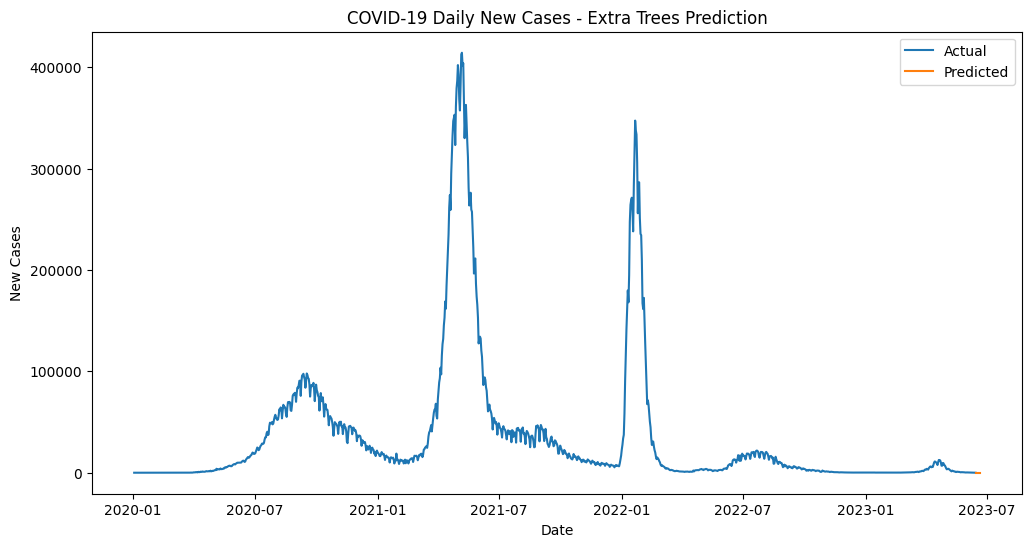

In [ ]:
import matplotlib.pyplot as plt

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot['India'], label='Actual')

# Plot the predicted data
plt.plot(future_dates, y_pred, label='Predicted')

plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('COVID-19 Daily New Cases - Extra Trees Prediction')
plt.legend()
plt.show()

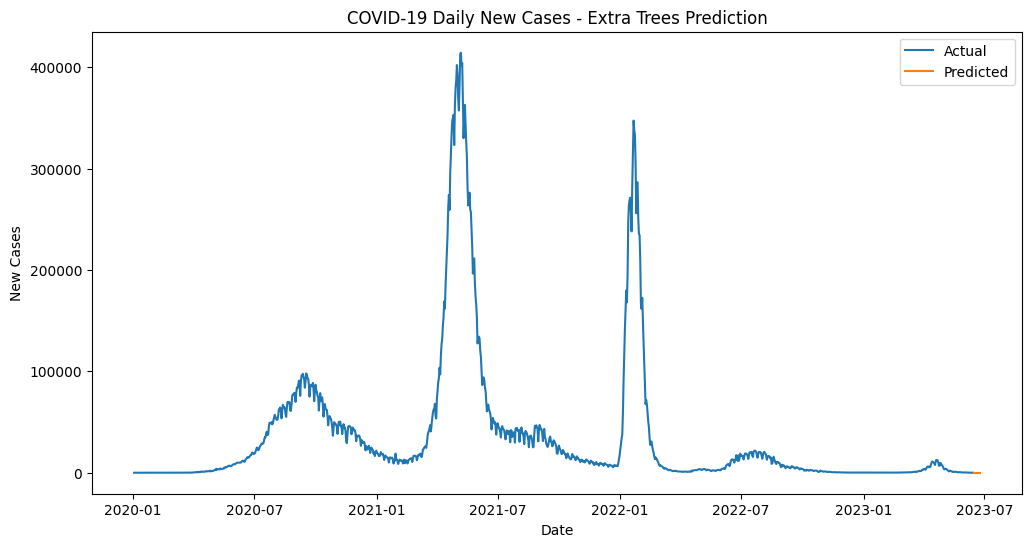

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Retrieve the last date from the dataset
last_date = df_pivot.index[-1]

# Step 2: Generate a sequence of dates for the next 10 days
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=10, freq='D')

# Step 3: Convert the dates to the appropriate format
future_dates_formatted = future_dates.strftime('%Y-%m-%d')

# Step 4: Use the Extra Trees model to predict the cases for the next 10 days
X_future = pd.to_datetime(future_dates_formatted).values.reshape(-1, 1)
y_pred = rf_model.predict(X_future)

# Step 5: Plot the predicted values
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot['India'], label='Actual')
plt.plot(future_dates, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('COVID-19 Daily New Cases - Extra Trees Prediction')
plt.legend()
plt.show()


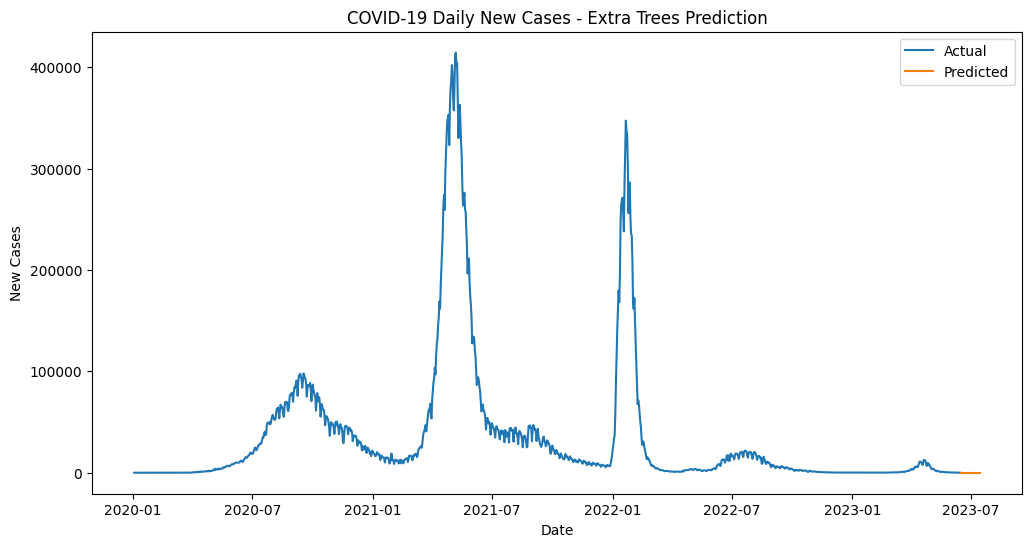

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Retrieve the last date from the dataset
last_date = df_pivot.index[-1]

# Step 2: Generate a sequence of dates for the next 1 month
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=30, freq='D')

# Step 3: Convert the dates to the appropriate format
future_dates_formatted = future_dates.strftime('%Y-%m-%d')

# Step 4: Use the Extra Trees model to predict the cases for the next 1 month
X_future = pd.to_datetime(future_dates_formatted).values.reshape(-1, 1)
y_pred = rf_model.predict(X_future)

# Step 5: Plot the predicted values
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot['India'], label='Actual')
plt.plot(future_dates, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('COVID-19 Daily New Cases - Extra Trees Prediction')
plt.legend()
plt.show()


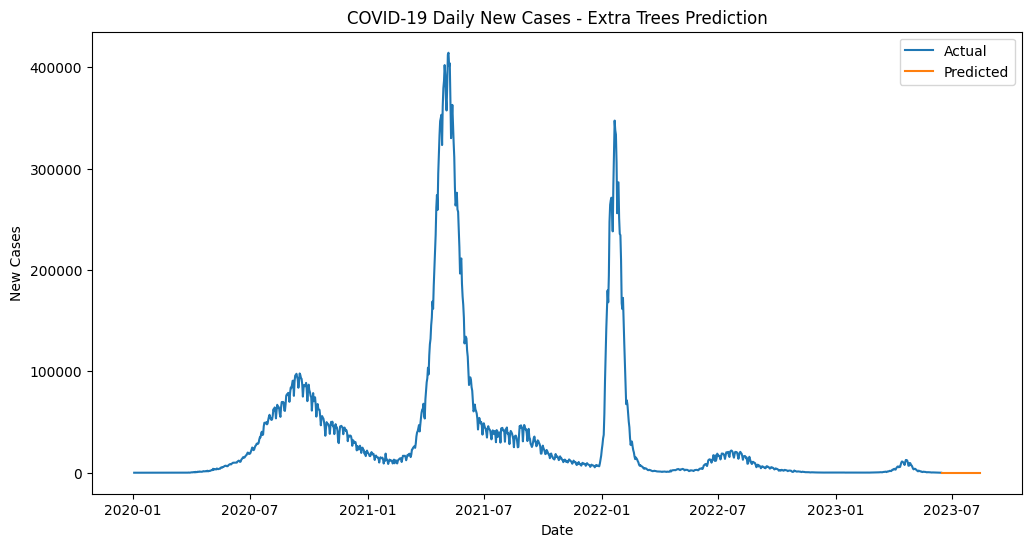

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Retrieve the last date from the dataset
last_date = df_pivot.index[-1]

# Step 2: Generate a sequence of dates for the next 2 months
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=60, freq='D')

# Step 3: Convert the dates to the appropriate format
future_dates_formatted = future_dates.strftime('%Y-%m-%d')

# Step 4: Use the Extra Trees model to predict the cases for the next 2 months
X_future = pd.to_datetime(future_dates_formatted).values.reshape(-1, 1)
y_pred = rf_model.predict(X_future)

# Step 5: Plot the predicted values
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot['India'], label='Actual')
plt.plot(future_dates, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('COVID-19 Daily New Cases - Extra Trees Prediction')
plt.legend()
plt.show()


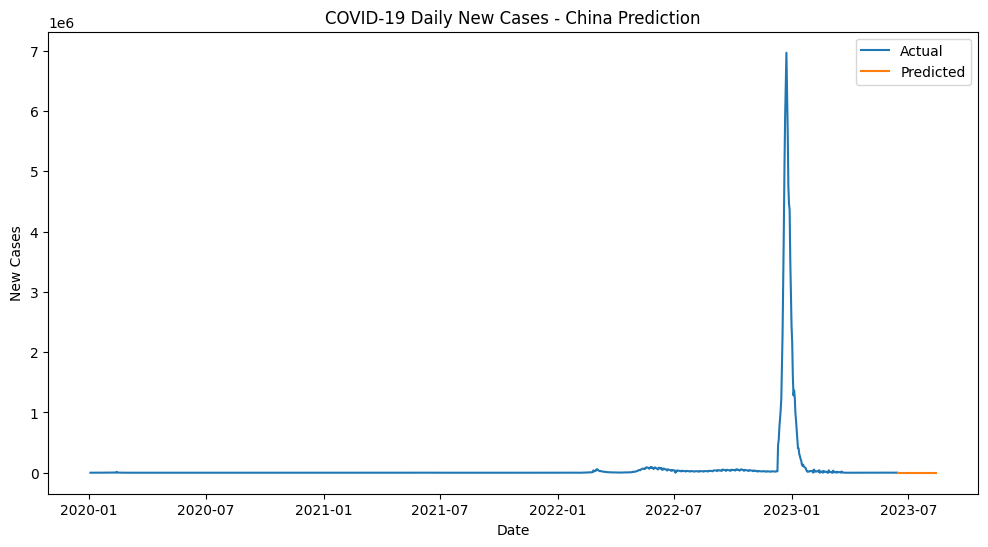

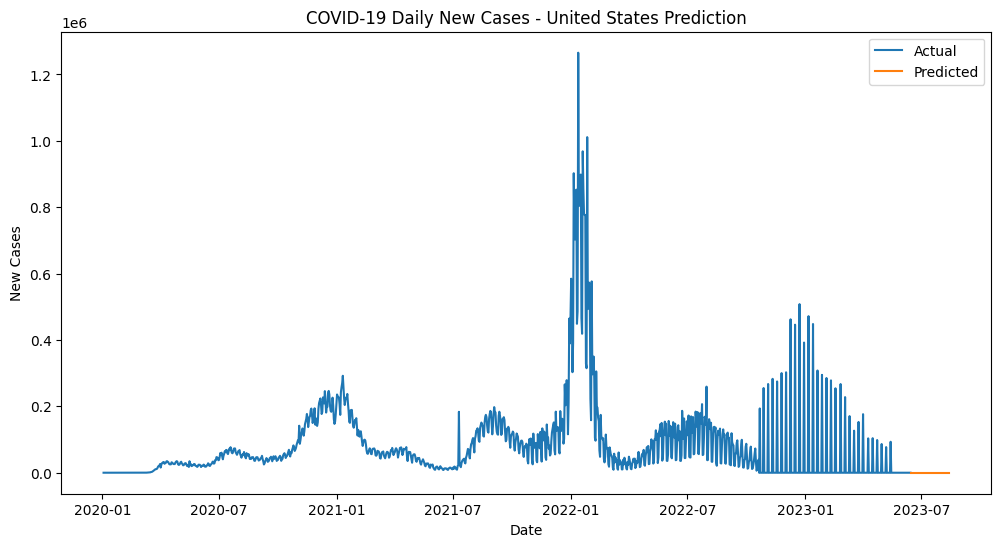

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Retrieve the last date from the dataset
last_date = df_pivot.index[-1]

# Step 2: Generate a sequence of dates for the next 2 months
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=60, freq='D')

# Step 3: Convert the dates to the appropriate format
future_dates_formatted = future_dates.strftime('%Y-%m-%d')

# Step 4: Use the Extra Trees model to predict the cases for the next 2 months
X_future = pd.to_datetime(future_dates_formatted).values.reshape(-1, 1)
y_pred_china = rf_model.predict(X_future)
y_pred_us = rf_model.predict(X_future)

# Step 5: Plot the predicted values for China
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot['China'], label='Actual')
plt.plot(future_dates, y_pred_china, label='Predicted')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('COVID-19 Daily New Cases - China Prediction')
plt.legend()
plt.show()

# Step 6: Plot the predicted values for the United States
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot['United States'], label='Actual')
plt.plot(future_dates, y_pred_us, label='Predicted')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('COVID-19 Daily New Cases - United States Prediction')
plt.legend()
plt.show()


In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # Retrieve input data from the request
    data = request.json

    # Perform necessary data preprocessing

    # Make predictions using the loaded model
    predictions = model.predict(data)

    # Return the predictions as a JSON response
    return jsonify(predictions.tolist())

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
